<a href="https://www.kaggle.com/code/jakubwalczykowski/wine-classification-tf-pca?scriptVersionId=123387384" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Input, Conv1D, Dense, Flatten, Dropout, GlobalMaxPooling1D, MaxPooling1D, BatchNormalization
from tensorflow import keras
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
import os
from keras import callbacks
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score


from sklearn.model_selection import RepeatedKFold, cross_val_score


# 1. Data upload and exploration

In [2]:
#last submission was without orginal data, this time I'm going to marge orginal dataset with train dataset
train_df = pd.read_csv('/kaggle/input/playground-series-s3e5/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e5/test.csv')
sub_df = pd.read_csv('/kaggle/input/playground-series-s3e5/sample_submission.csv')
original_df = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
train_df


,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.20,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.30,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.10,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.60,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.30,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2051,6.6,0.31,0.13,2.00,0.056,29.0,42.0,0.99388,3.52,0.87,12.0,7
2052,2052,9.7,0.59,0.21,1.80,0.079,27.0,65.0,0.99745,3.14,0.58,9.4,5
2053,2053,7.7,0.43,0.42,1.70,0.071,19.0,37.0,0.99258,3.32,0.77,12.5,8
2054,2054,9.1,0.50,0.00,1.75,0.058,5.0,13.0,0.99670,3.22,0.42,9.5,5


In [3]:
original_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
original_df=original_df.drop(['Id'],axis=1)
original_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [5]:
train_df['quality'].value_counts()

5    839
6    778
7    333
4     55
8     39
3     12
Name: quality, dtype: int64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed acidity         2056 non-null   float64
 2   volatile acidity      2056 non-null   float64
 3   citric acid           2056 non-null   float64
 4   residual sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free sulfur dioxide   2056 non-null   float64
 7   total sulfur dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


In [7]:
train_df.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,1027.500000,8.365175,0.527601,0.265058,2.398881,0.081856,16.955982,49.236868,0.996748,3.310569,0.641308,10.414972,5.720817
std,593.660397,1.705390,0.173164,0.188267,0.858824,0.023729,10.009710,32.961141,0.001827,0.142321,0.137942,1.028825,0.853146
min,0.000000,5.000000,0.180000,0.000000,1.200000,0.012000,1.000000,7.000000,0.990070,2.740000,0.390000,8.700000,3.000000
25%,513.750000,7.200000,0.390000,0.090000,1.900000,0.071000,8.000000,22.000000,0.995600,3.200000,0.550000,9.500000,5.000000
50%,1027.500000,7.950000,0.520000,0.250000,2.200000,0.079000,16.000000,44.000000,0.996700,3.310000,0.610000,10.100000,6.000000
75%,1541.250000,9.200000,0.640000,0.420000,2.600000,0.090000,24.000000,65.000000,0.997800,3.390000,0.720000,11.000000,6.000000
max,2055.000000,15.900000,1.580000,0.760000,14.000000,0.414000,68.000000,289.000000,1.003690,3.780000,1.950000,14.000000,8.000000


In [8]:
train_df=train_df.drop(['Id'],axis=1)


In [9]:
train_df = pd.concat([train_df, original_df])
train_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.0,0.500,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,9.3,0.300,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,7.1,0.510,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,8.1,0.870,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,8.5,0.360,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


# 2. EDA

In [10]:
#sns.pairplot(data=train_df, hue='quality')

In [11]:
quality_class=train_df['quality'].value_counts()
fig=px.pie(values=quality_class.values,
          names=quality_class.index,
          color_discrete_sequence=px.colors.sequential.RdBu,
          title="Quality class distribution", template='presentation'
          )
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='percent+label')
fig.show();

<AxesSubplot:>

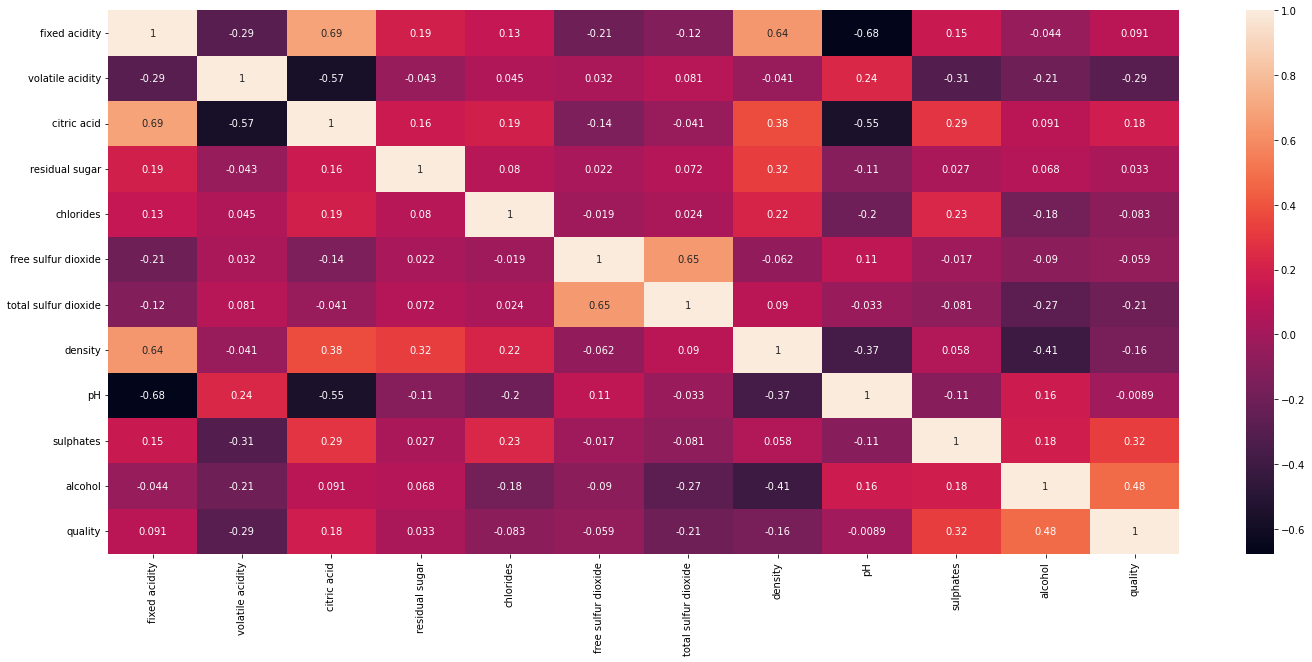

In [12]:
corr = train_df.corr()
plt.figure(figsize = (24,10))
sns.heatmap(corr,annot = True,cmap = 'rocket')

In [13]:
px.scatter(train_df, x='density', y='citric acid', 
           color='quality', log_x=True, size_max=50,
           title="quality by density and citric acid", template='presentation')
#, hover_name='Id'

In [14]:
px.scatter(train_df, x='alcohol', y='sulphates', 
           color='quality', size='residual sugar', log_x=True, size_max=50,
           title="quality by alcohol,residual sugar and sulphates", template='presentation')
#, hover_name='Id'

From correlation matrix we can see that sulphates and alcohol variables have the strongest impact on quality. If you ever made homemade wine you know that yeast produce alcohol from sugar contained in grapes. The trick is to stop that process in right moment before all sugar is consumed and wine become sour. Low amount of sulfates are resoult of fermentation, but also sulfur oxide is added to stop yeast activity, this process spikes sulfates amount. There are ways to stop yeast activity without adding sulfur (e.g. pasteurization).

So everything comes down to stoping fermentation in a right time, the initial variable is amount of sugar contained in grapes and balancing that with alcohol amount, sulfates are undesirable variable that we cannot completely eliminate.

###this comment comes from my amateur wine production knowledge, I haven't poisoned anyone, yet.... ;)

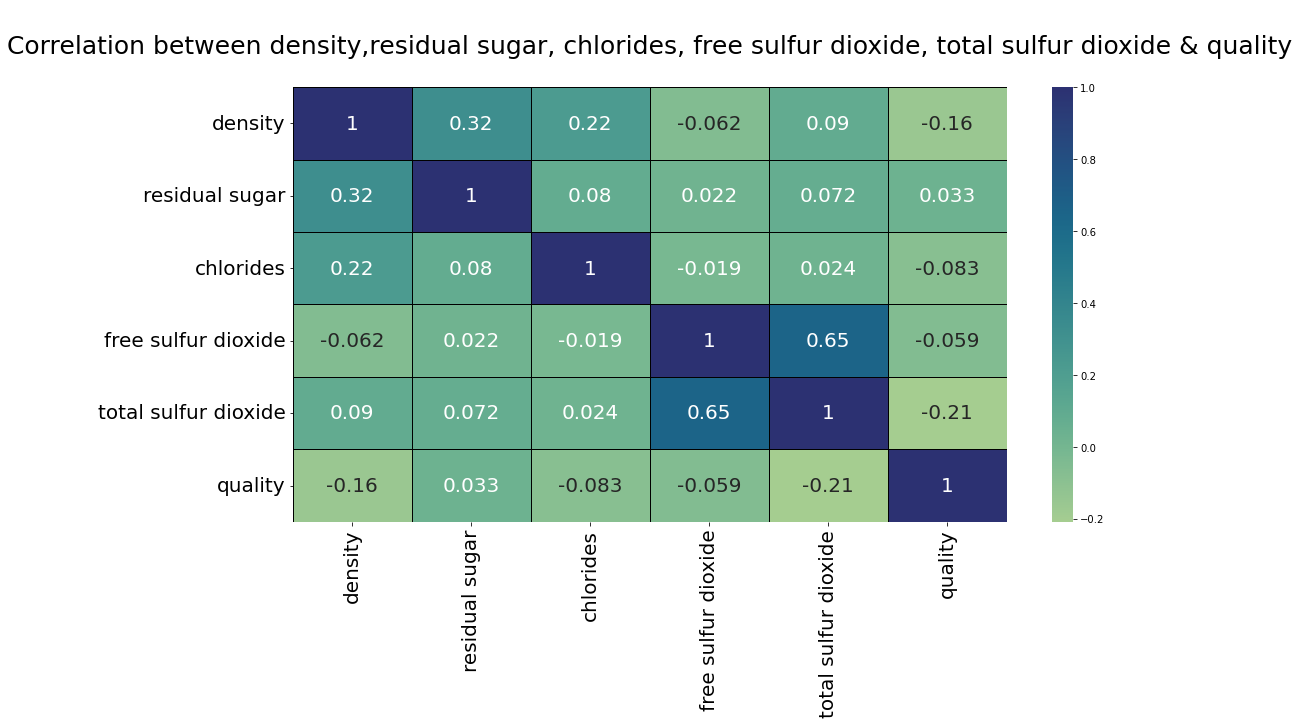

In [15]:
plt.figure(figsize = (16,8))
ax = sns.heatmap(train_df[['density', 'residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'quality']].corr(), \
            annot=True, annot_kws={"size": 20}, cmap= "crest", linewidths=0.5, linecolor='black')
plt.yticks(rotation=0, fontsize=20) 
plt.xticks(rotation=90, fontsize=20) 
plt.title("\nCorrelation between density,residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide & quality\n", fontsize=25)
plt.show()

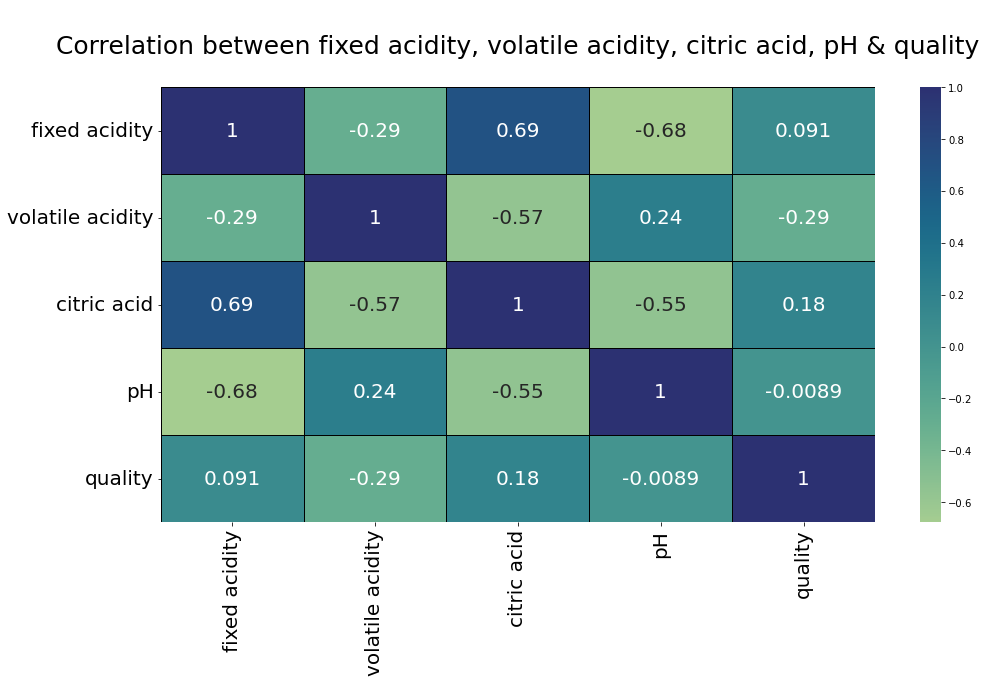

In [16]:
plt.figure(figsize = (16,8))
ax = sns.heatmap(train_df[['fixed acidity', 'volatile acidity', 'citric acid', 'pH', 'quality']].corr(), \
            annot=True, annot_kws={"size": 20}, cmap= "crest", linewidths=0.5, linecolor='black')
plt.yticks(rotation=0, fontsize=20) 
plt.xticks(rotation=90, fontsize=20) 
plt.title("\nCorrelation between fixed acidity, volatile acidity, citric acid, pH & quality\n", fontsize=25)
plt.show()

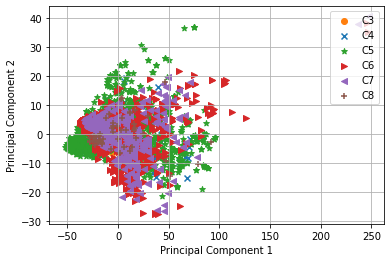

In [17]:
from sklearn.decomposition import PCA

C3= train_df[train_df.quality == 3].drop(columns=['quality'])
C4= train_df[train_df.quality == 4].drop(columns=['quality'])
C5= train_df[train_df.quality == 5].drop(columns=['quality'])
C6= train_df[train_df.quality == 6].drop(columns=['quality'])
C7= train_df[train_df.quality == 7].drop(columns=['quality'])
C8= train_df[train_df.quality == 8].drop(columns=['quality'])

pca = PCA(n_components = 6)

pc_3 = pca.fit_transform(C3)
pc_4 = pca.fit_transform(C4)
pc_5 = pca.fit_transform(C5)
pc_6 = pca.fit_transform(C6)
pc_7 = pca.fit_transform(C7)
pc_8 = pca.fit_transform(C8)


plt.scatter(pc_3[:,0], pc_3[:,1],c= '#ff7f0e', marker ='o', label = "C3")
plt.scatter(pc_4[:,0], pc_4[:,1],c= '#1f77b4', marker ='x', label = "C4")
plt.scatter(pc_5[:,0], pc_5[:,1],c= '#2ca02c', marker ='*', label = "C5")
plt.scatter(pc_6[:,0], pc_6[:,1],c= '#d62728', marker ='>', label = "C6")
plt.scatter(pc_7[:,0], pc_7[:,1],c= '#9467bd', marker ='<', label = "C7")
plt.scatter(pc_8[:,0], pc_8[:,1],c= '#8c564b', marker ='+', label = "C8")

plt.grid('on')
plt.legend(loc="upper right")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.rcParams["figure.figsize"] = (25,15)
plt.show()

In [18]:
# Feature Engineering Idea by Jose Cáliz
# https://www.kaggle.com/competitions/playground-series-s3e5/discussion/382698

train_df['total_acid'] = train_df['fixed acidity'] + train_df['volatile acidity'] + train_df['citric acid']
train_df['acid/density'] = train_df['total_acid']  / train_df['density']
train_df['alcohol_density'] = train_df['alcohol']  * train_df['density']
train_df['sulphate/density'] = train_df['sulphates']  / train_df['density']
train_df['sulphates/acid'] = train_df['sulphates'] / train_df['volatile acidity']
train_df['sulphates/chlorides'] = train_df['sulphates'] / train_df['chlorides']
train_df['sulphates*alcohol'] = train_df['sulphates'] * train_df['alcohol']
test_df['total_acid'] = test_df['fixed acidity'] + test_df['volatile acidity'] + test_df['citric acid']
test_df['acid/density'] = test_df['total_acid']  / test_df['density']
test_df['alcohol_density'] = test_df['alcohol']  * test_df['density']
test_df['sulphate/density'] = test_df['sulphates']  / test_df['density']
test_df['sulphates/acid'] = test_df['sulphates'] / test_df['volatile acidity']
test_df['sulphates/chlorides'] = test_df['sulphates'] / test_df['chlorides']
test_df['sulphates*alcohol'] = test_df['sulphates'] * test_df['alcohol']

# 3. Preprocessing

In [19]:
X = train_df.drop(labels=["quality"],axis = 1) 
y = train_df["quality"]

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([3, 3, 4, ..., 2, 3, 2])

In [21]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes = 6)
y

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.20105202, -0.16491958,  0.64706743, ...,  0.17673888,
         0.72543086,  1.40071156],
       [ 0.5546557 , -1.30480258,  2.42471732, ...,  1.13041443,
        -0.34677715,  0.99234032],
       [-0.72423428, -0.10792543, -1.23515009, ...,  0.02732251,
         1.32466807,  0.81212791],
       ...,
       [-1.24741655,  0.40502192, -0.97373099, ..., -0.61187745,
        -0.62199731, -0.37771487],
       [-1.42181064,  0.12005117, -0.86916335, ..., -0.0408392 ,
         1.28696674,  0.95706939],
       [-1.42181064,  0.66149559, -0.76459571, ..., -0.42741203,
         0.37038154,  0.25716187]])

In [23]:
test_df=test_df.drop(['Id'], axis=1)
scaler = StandardScaler()
test_df = scaler.fit_transform(test_df)
test_df

array([[-0.70285172, -0.08091046, -1.40344452, ..., -0.38655036,
        -0.26430644, -0.60784149],
       [-0.70285172,  1.30423039, -0.64939243, ..., -0.76372968,
        -0.58352052, -0.00710234],
       [ 0.01826442, -0.36359226,  0.69712917, ..., -0.00940013,
         0.48515272, -0.37592549],
       ...,
       [-0.64275871,  1.33249857, -1.45730538, ..., -0.9274219 ,
        -0.69601244, -0.69163811],
       [-0.46247967,  1.44557129, -0.05692292, ..., -1.08934444,
        -1.28087509, -0.92355411],
       [ 0.25863647,  1.44557129, -0.27236638, ..., -1.03272122,
        -0.60866577, -0.64914968]])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2399, 18)
(800, 18)
(2399, 6)
(800, 6)


In [25]:
# from imblearn.over_sampling import SMOTE
# SMOTE = SMOTE(random_state = 42)
# X_train, y_train = SMOTE.fit_resample(X_train, y_train)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [26]:
from imblearn.over_sampling import RandomOverSampler
RandomOverSampler = RandomOverSampler(random_state = 42)
X_train, y_train = RandomOverSampler.fit_resample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5898, 18)
(800, 18)
(5898, 6)
(800, 6)


# 4. Model preparation

In [27]:
i= Input(shape=18)
x = layers.Dense(512, activation='relu')(i)
x = layers.Dropout(0.6)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(2048, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.4)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dense(8, activation='relu')(x)
x = layers.Dense(units= 6, activation='softmax')(x)

model=Model(i,x)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 18)]              0         
_________________________________________________________________
dense (Dense)                (None, 512)               9728      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              1050624   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              209817

In [28]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", monitor = "val_loss",verbose=0, save_best_only=True)

In [29]:

from tensorflow.python import metrics
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
r= model.fit(X_train,y_train, validation_data=(X_test, y_test) ,epochs=100, callbacks=[checkpointer],shuffle=True,batch_size=16)

Epoch 1/100
369/369 [==============================] - 4s 6ms/step - loss: 1.6340 - accuracy: 0.2650 - val_loss: 1.7014 - val_accuracy: 0.3275
Epoch 2/100
369/369 [==============================] - 2s 5ms/step - loss: 1.4809 - accuracy: 0.3413 - val_loss: 1.6196 - val_accuracy: 0.1587
Epoch 3/100
369/369 [==============================] - 2s 6ms/step - loss: 1.3698 - accuracy: 0.4020 - val_loss: 1.5374 - val_accuracy: 0.1437
Epoch 4/100
369/369 [==============================] - 2s 5ms/step - loss: 1.3009 - accuracy: 0.4327 - val_loss: 1.5228 - val_accuracy: 0.1150
Epoch 5/100
369/369 [==============================] - 2s 5ms/step - loss: 1.2647 - accuracy: 0.4474 - val_loss: 1.5121 - val_accuracy: 0.1838
Epoch 6/100
369/369 [==============================] - 2s 5ms/step - loss: 1.2129 - accuracy: 0.4627 - val_loss: 1.5039 - val_accuracy: 0.2512
Epoch 7/100
369/369 [==============================] - 2s 5ms/step - loss: 1.2033 - accuracy: 0.4641 - val_loss: 1.5522 - val_accuracy: 0.1112

In [31]:
print("train_score:",model.evaluate(X_train,y_train))
print("test_score:",model.evaluate(X_test,y_test))
print("val_cohen_kappa",model.evaluate(X_test,y_test))

185/185 [==============================] - 1s 3ms/step - loss: 0.5344 - accuracy: 0.7792
train_score: [0.5343566536903381, 0.7792472243309021]
25/25 [==============================] - 0s 2ms/step - loss: 1.2866 - accuracy: 0.4762
test_score: [1.2865756750106812, 0.4762499928474426]
25/25 [==============================] - 0s 2ms/step - loss: 1.2866 - accuracy: 0.4762
val_cohen_kappa [1.2865756750106812, 0.4762499928474426]


In [32]:
model.load_weights('best_weights.hdf5')

In [33]:
print("train_score:",model.evaluate(X_train,y_train))
print("test_score:",model.evaluate(X_test,y_test))
print("val_cohen_kappa",model.evaluate(X_test,y_test))

185/185 [==============================] - 1s 4ms/step - loss: 0.5958 - accuracy: 0.7726
train_score: [0.595826268196106, 0.7726348042488098]
25/25 [==============================] - 0s 3ms/step - loss: 1.2525 - accuracy: 0.4512
test_score: [1.252531886100769, 0.45124998688697815]
25/25 [==============================] - 0s 2ms/step - loss: 1.2525 - accuracy: 0.4512
val_cohen_kappa [1.252531886100769, 0.45124998688697815]


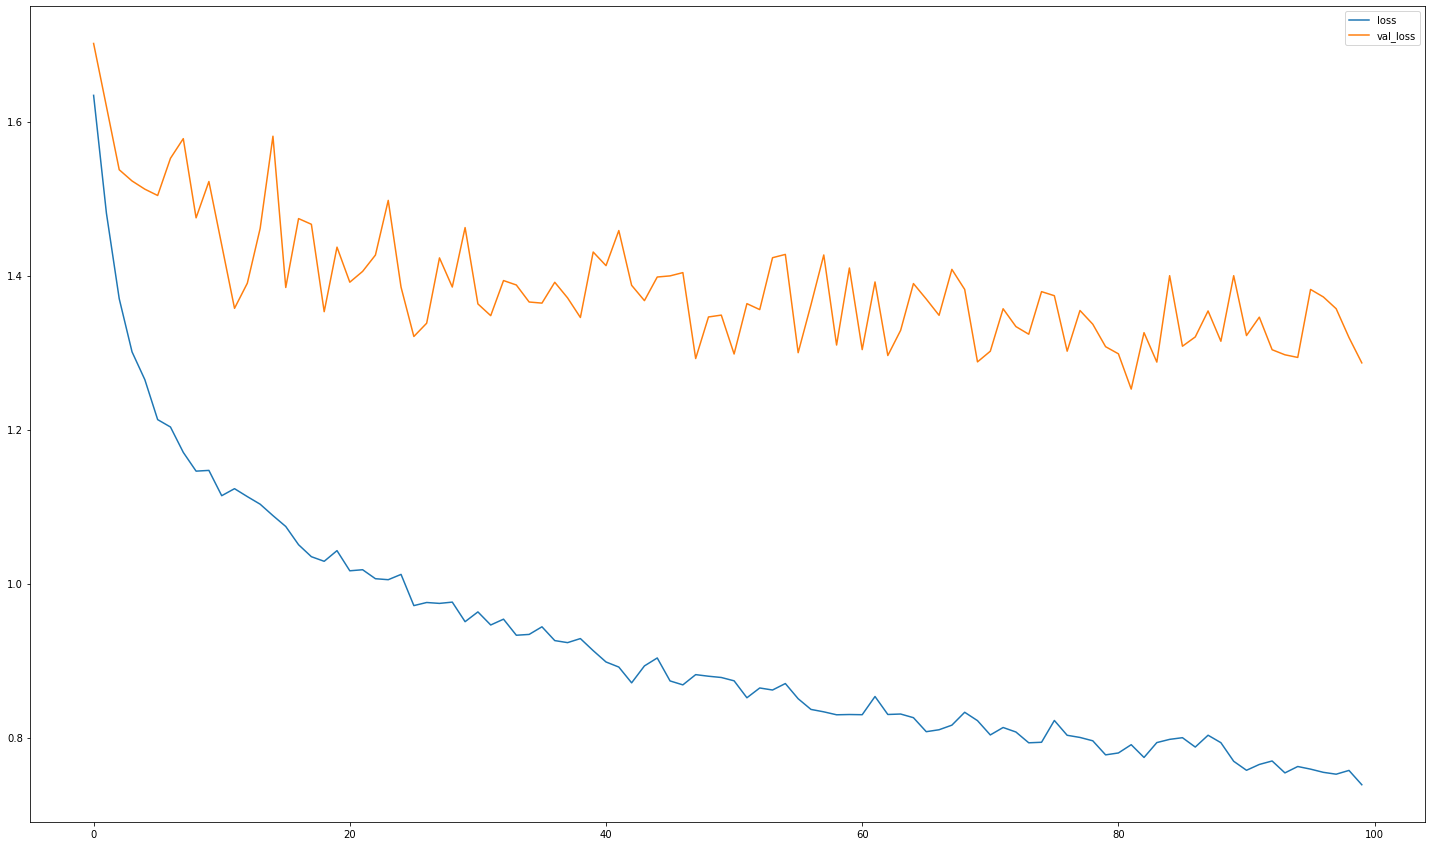

In [34]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend();

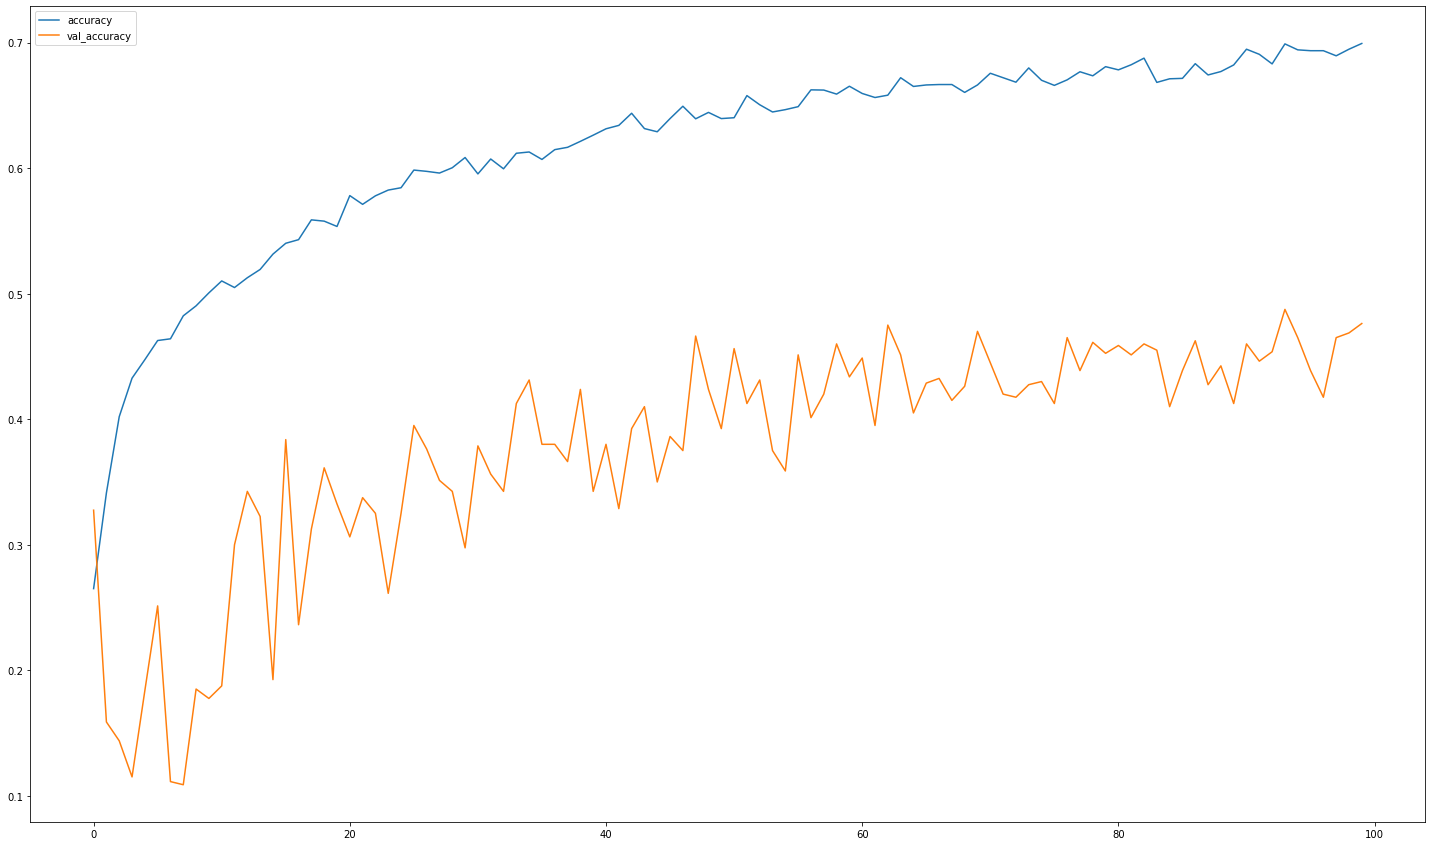

In [35]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend();

In [36]:
test_df

array([[-0.70285172, -0.08091046, -1.40344452, ..., -0.38655036,
        -0.26430644, -0.60784149],
       [-0.70285172,  1.30423039, -0.64939243, ..., -0.76372968,
        -0.58352052, -0.00710234],
       [ 0.01826442, -0.36359226,  0.69712917, ..., -0.00940013,
         0.48515272, -0.37592549],
       ...,
       [-0.64275871,  1.33249857, -1.45730538, ..., -0.9274219 ,
        -0.69601244, -0.69163811],
       [-0.46247967,  1.44557129, -0.05692292, ..., -1.08934444,
        -1.28087509, -0.92355411],
       [ 0.25863647,  1.44557129, -0.27236638, ..., -1.03272122,
        -0.60866577, -0.64914968]])

In [37]:
test_df=pd.DataFrame(test_df)
test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.702852,-0.080910,-1.403445,-0.451691,-0.162178,1.387848,0.149755,0.444856,0.550232,-0.425007,-0.655516,-0.830122,-0.838095,-0.651954,-0.428570,-0.386550,-0.264306,-0.607841
1,-0.702852,1.304230,-0.649392,-0.451691,0.779217,-0.317191,-0.429659,-0.444776,0.125763,0.242931,-0.460735,-0.608869,-0.607959,-0.471489,0.247013,-0.763730,-0.583521,-0.007102
2,0.018264,-0.363592,0.697129,-0.451691,-0.614048,0.384884,0.027773,0.587636,-1.642858,0.020285,-0.947687,0.054890,0.050574,-0.944145,0.015094,-0.009400,0.485153,-0.375925
3,-0.222108,-0.307056,0.697129,-0.668889,-0.952950,-0.317191,-0.734614,-1.026880,-0.086472,0.020285,1.194901,-0.169236,-0.159626,1.183119,0.029335,-0.053662,1.000406,0.467942
4,-1.123503,-1.042029,0.266242,-0.343092,-1.404819,-0.918970,1.369573,-1.707833,-0.581685,-1.241375,2.266195,-1.151945,-1.145427,2.244874,-1.230214,-0.011283,0.776609,-0.394219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,0.258636,1.247694,-0.487810,0.308502,0.101413,2.390812,2.009978,0.856722,0.479487,0.391361,-0.655516,0.322118,0.316499,-0.644718,0.383217,-0.706409,-0.049184,0.028305
1368,4.344961,-1.607392,1.505042,0.525700,-0.727015,-0.618080,-0.734614,0.313059,-2.279561,0.910868,-0.363345,4.152383,4.175127,-0.359718,0.907564,2.633632,1.260803,0.569442
1369,-0.642759,1.332499,-1.457305,-0.234493,0.515626,-1.119562,-0.917587,1.169741,2.531087,-0.350792,-1.045077,-0.634730,-0.647744,-1.032568,-0.360297,-0.927422,-0.696012,-0.691638
1370,-0.462480,1.445571,-0.056923,0.199903,1.381710,-0.016302,1.674528,-0.280029,-0.086472,-0.870298,-0.558125,-0.301413,-0.299752,-0.566613,-0.868282,-1.089344,-1.280875,-0.923554


In [38]:
test_predcit = model.predict(test_df)
test_predcit = np.argmax(test_predcit, axis=-1).flatten()

In [39]:
test_predcit = encoder.inverse_transform(test_predcit)
sub_df['quality'] = test_predcit
sub_df.head(50)


,Id,quality
0,2056,5
1,2057,6
2,2058,5
3,2059,7
4,2060,7
5,2061,7
6,2062,8
7,2063,6
8,2064,8
9,2065,5


In [40]:
sub_df['quality'].value_counts()

5    482
7    357
6    281
4    153
8     78
3     21
Name: quality, dtype: int64

In [41]:
sub_df.to_csv('submission.csv', index=False)



Thank you, feedback is highly appreciated! :)

Please upvote if you found this helpful 👍
